In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import Hodograph, SkewT
from metpy.units import units

In [3]:
col_names = ['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed']

df = pd.read_fwf(get_test_data('nov11_sounding.txt', as_file_obj=False),
                 skiprows=5, usecols=[0, 1, 2, 3, 6, 7], names=col_names)

# Drop any rows with all NaN values for T, Td, winds
df = df.dropna(subset=('temperature', 'dewpoint', 'direction', 'speed'
                       ), how='all').reset_index(drop=True)


In [6]:
df.head()

,pressure,height,temperature,dewpoint,direction,speed
0,978.0,180,20.4,16.5,180.0,16.0
1,964.1,305,22.2,17.1,185.0,29.0
2,954.0,397,23.6,17.6,188.0,35.0
3,931.0,610,22.5,16.5,195.0,49.0
4,925.0,667,22.2,16.2,200.0,48.0


In [10]:
p = df['pressure'].values * units.hPa
T = df['temperature'].values * units.degC
Td = df['dewpoint'].values * units.degC
wind_speed = df['speed'].values * units.knots
wind_dir = df['direction'].values * units.degrees
u, v = mpcalc.wind_components(wind_speed, wind_dir)

In [13]:
# Calculate the LCl 
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
print(lcl_pressure, lcl_temperature)

# Calculate the parcel profile 
parcel_prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')


923.1157642313726 hectopascal 15.595751336163403 degree_Celsius


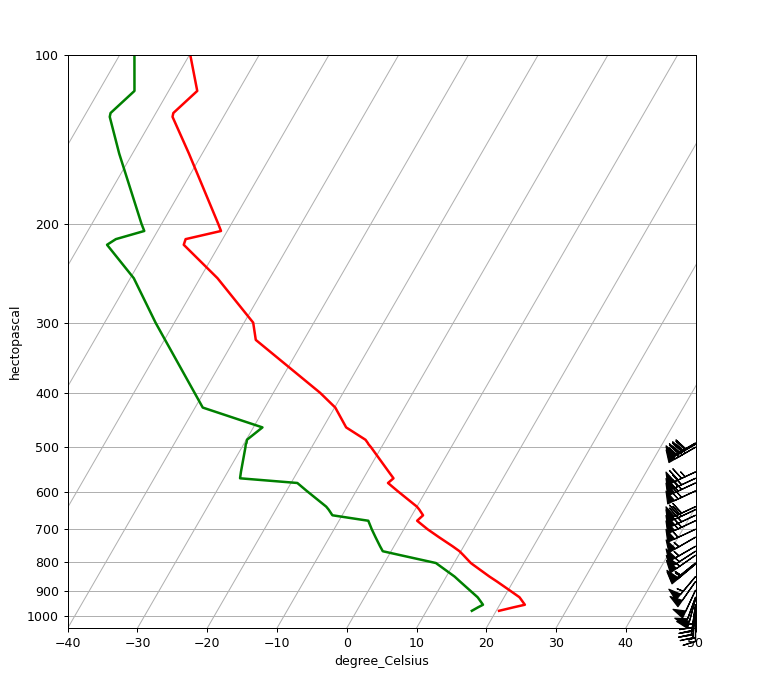

In [20]:
# Basic Skew-T plotting

fig = plt.figure(figsize=(9,9), dpi=90)
skew = SkewT(fig)

# Y axis --> independent variable, "height" in pressure scale even it is in Y axis 
# X axis --> pressure and dewpoint

skew.plot(p, T, 'r', linewidth=2)
skew.plot(p, Td, 'g', linewidth=2)
skew.plot_barbs(p, u, v)

plt.show()



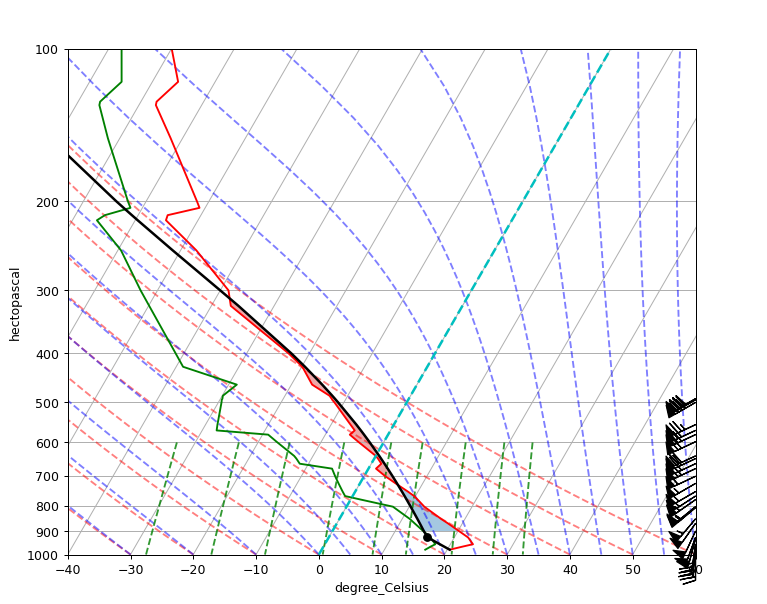

In [68]:
# Advanced SkewT plotting 

fig = plt.figure(figsize=(9,9), dpi = 90)
skew = SkewT(fig, rotation = 30)

skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)

skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)

# LCL temperature is in Black dot
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# Parcel Profile as Black Line 
skew.plot(p, parcel_prof, 'k', linewidth = 2)

# Shade areas of CAPE and CIN 
# CAPE -Positive, CIN - Negative 
skew.shade_cin(p, T, parcel_prof, Td)
skew.shade_cape(p, T, parcel_prof)

# zero degree isotherm 
skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# relevant lines 
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

plt.show()

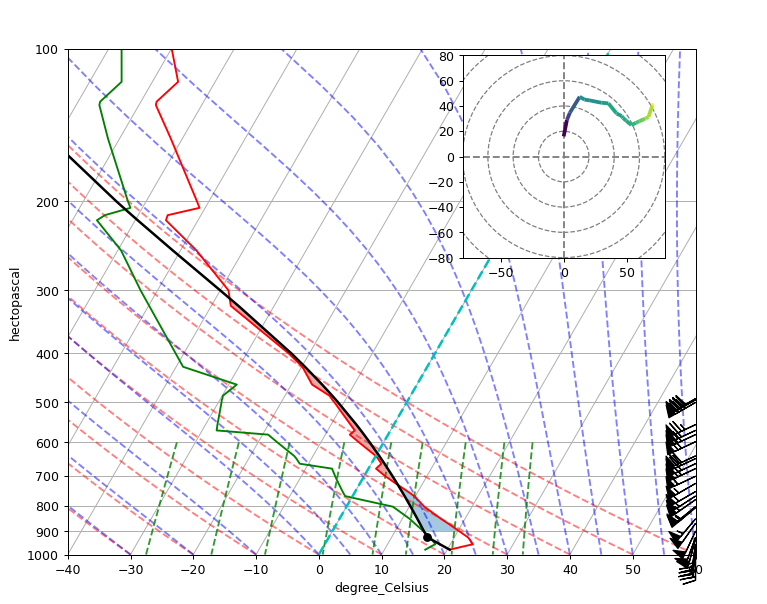

In [84]:
# Adding a hologram 

fig = plt.figure(figsize=(9,9), dpi = 90)
skew = SkewT(fig, rotation = 30)

skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)

skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)

# LCL temperature is in Black dot
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# Parcel Profile as Black Line 
skew.plot(p, parcel_prof, 'k', linewidth = 2)

# Shade areas of CAPE and CIN 
# CAPE -Positive, CIN - Negative 
skew.shade_cin(p, T, parcel_prof, Td)
skew.shade_cape(p, T, parcel_prof)

# zero degree isotherm 
skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# relevant lines 
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Add a hodograph
# Create an inset axes object that is 40% width and height of the
# figure and put it in the upper right hand corner.

ax_hod = inset_axes(skew.ax, '40%', '40%', loc=1)
h = Hodograph(ax_hod, component_range=80.)
h.add_grid(increment=20)
h.plot_colormapped(u, v, wind_speed)  # Plot a line colored by wind speed


plt.show()